Classification Report:

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00       2.0
        fear       0.00      0.00      0.00       1.0

   micro avg       0.00      0.00      0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

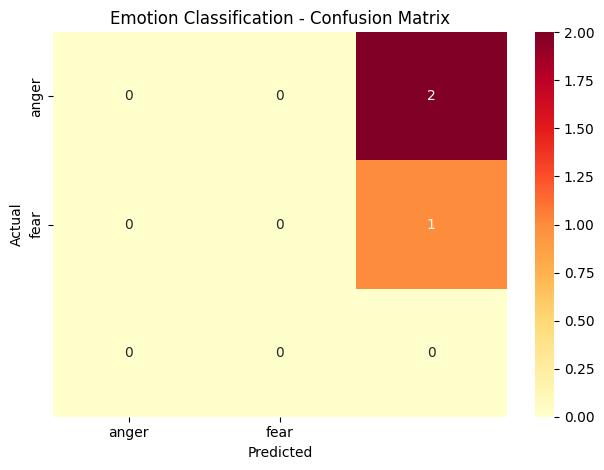

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Sample emotion dataset (sentence-emotion pairs)
data = {
    'Text': [
        "I am so happy to hear this news!",
        "Why did you do that? I'm really angry.",
        "I'm feeling very sad today.",
        "This is terrifying. I can't move.",
        "You always make me smile!",
        "I'm nervous about the interview tomorrow.",
        "I feel safe and content with you.",
        "Losing her was the hardest moment of my life.",
        "He lied to me, and now I'm furious.",
        "I love spending time with my family."
    ],
    'Emotion': [
        'joy', 'anger', 'sadness', 'fear', 'joy',
        'fear', 'joy', 'sadness', 'anger', 'joy'
    ]
}

df = pd.DataFrame(data)

# Encode target labels
df['Emotion_Label'] = df['Emotion'].astype('category').cat.codes
label_map = dict(enumerate(df['Emotion'].astype('category').cat.categories))

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])
y = df['Emotion_Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=[label_map[i] for i in sorted(y_test.unique())], labels=sorted(y_test.unique())))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='YlOrRd', fmt='d',
            xticklabels=[label_map[i] for i in sorted(y_test.unique())], yticklabels=[label_map[i] for i in sorted(y_test.unique())])
plt.title("Emotion Classification - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()